In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

Loaded 27 images!


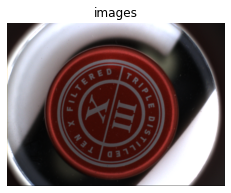

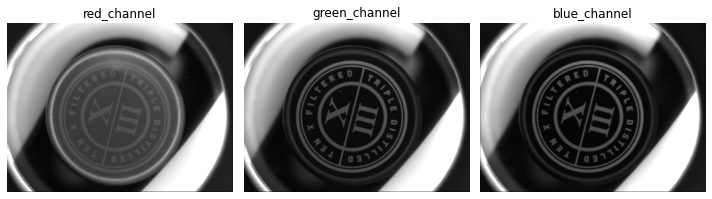

In [2]:
images = []
folder_path = 'cap-inspection-images/project_3_off-center_decoration/'
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    if file_path.endswith(('.bmp')):
        image_org = cv2.imread(file_path)
        images.append(cv2.cvtColor(np.copy(image_org),cv2.COLOR_BGR2RGB))
print('Loaded '+ str(len(images))+ ' images!')


blue_channel = []
red_channel = []
green_channel = []

for image in images:
    channels = image.shape[2] if len(image.shape) == 3 else 1

    if channels == 3:
        red, green, blue = cv2.split(image)
        red_channel.append(red)
        blue_channel.append(blue)
        green_channel.append(green)
        
    else:
        print("Please check the channel of the image!")

plt.figure(figsize=(6, 3))    
plt.title('images')    
plt.imshow(images[0])
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.title('red_channel')
plt.imshow(red_channel[0], cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title('green_channel')
plt.imshow(green_channel[0], cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title('blue_channel')
plt.imshow(blue_channel[0], cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()   

center of the cap in the first image(d_00):  370 318
diameter of the cap in the first image[0](d_00):  436


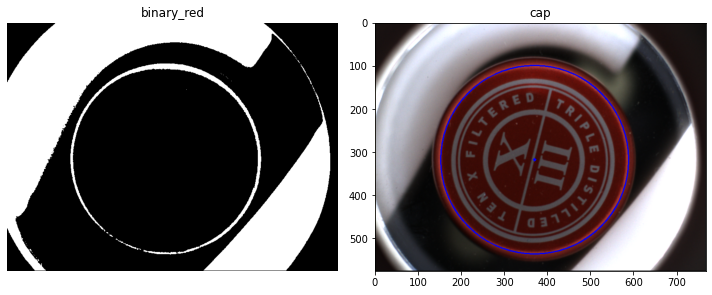

In [3]:
binary_red = []
cap = []
cap_center = []
for index, re in enumerate(red_channel):
    _, bin_red = cv2.threshold(re, 128, 255, cv2.THRESH_BINARY)
    binary_red.append(bin_red)
    # plt.imshow(binary_red, cmap='gray')
    # plt.show()
    cap_circle = cv2.HoughCircles(bin_red, cv2.HOUGH_GRADIENT, dp=1, minDist=500,
                               param1=150,param2=5,minRadius=200,maxRadius=300)

    if cap_circle is not None:
        cap.append(np.copy(images[index]))
        cap_circle = np.uint16(np.around(cap_circle))
        for i in cap_circle[0, :]:
            cv2.circle(cap[index], (i[0], i[1]), i[2], (0, 0, 255), 2)
            cv2.circle(cap[index], (i[0], i[1]), 2, (0, 0, 255), 3)
        capc = cap_circle[0][0]
        cap_center.append((int(capc[0]),int(capc[1]),int(capc[2])))  
#         print('center of the cap (x,y): ',cap_center[index][0],cap_center[index][1])
#         print('diameter of the cap: ',cap_center[index][2]*2)
#         plt.imshow(cap[index])
#         plt.show() 
    else:
        print("No cap circles or not enough circles detected.") 
        
print('center of the cap in the first image(d_00): ',cap_center[0][0],cap_center[0][1])
print('diameter of the cap in the first image[0](d_00): ',cap_center[0][2]*2)
       
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title('binary_red')
plt.imshow(binary_red[0], cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.title('cap')
plt.imshow(cap[0], cmap='gray')

plt.tight_layout()
plt.show()

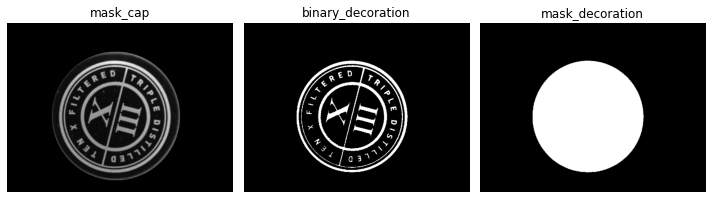

In [4]:
mask_cap =[]
binary_decoration = []
mask_decoration =[]

for index, blu in enumerate(blue_channel):
    mask = np.zeros_like(blue_channel[index])
    cv2.circle(mask, (cap_center[index][0],cap_center[index][1]), cap_center[index][2], 255, -1)
    mask_cap.append(cv2.bitwise_and(blu,mask))
#     plt.imshow(mask_cap[index], cmap='gray')
#     plt.show()
    _, bin_dec = cv2.threshold(mask_cap[index], 70, 255, cv2.THRESH_BINARY)
    binary_decoration.append(bin_dec)
#     plt.imshow(binary_dec[index], cmap='gray')
#     plt.show()
    contours, _ = cv2.findContours(binary_decoration[index], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours is not None:
        binary_dec_copy = np.copy(binary_decoration[index])
        max_contour = max(contours, key=cv2.contourArea)
        mask_decoration.append(cv2.drawContours(binary_dec_copy, [max_contour], -1, 255, thickness=cv2.FILLED))
#         plt.imshow(mask_dec[index], cmap='gray')
#         plt.show()
    else:
        print("No decoration contours detected.")

plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.title('mask_cap')
plt.imshow(mask_cap[0], cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title('binary_decoration')
plt.imshow(binary_decoration[0], cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title('mask_decoration')
plt.imshow(mask_decoration[0], cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()   

center of the cap in the first image(d_00):  370 318
diameter of the cap in the first image[0](d_00):  436
center of the decoration in the first image(d_00):  368 320
diameter of the decoration in the first image[0](d_00):  378
Off center distance: 2.83


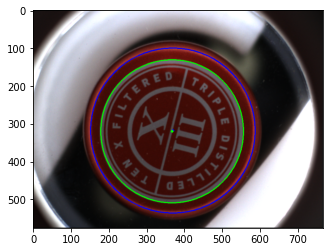

In [5]:
dec = []
dec_center = []
off_center_distance = []

for index, d in enumerate(mask_decoration):
    dec.append(np.copy(cap[index]))
    dec_circle = cv2.HoughCircles(d, cv2.HOUGH_GRADIENT, dp=1, minDist=500,
                               param1=100,param2=10,minRadius=180,maxRadius=200)

    if dec_circle is not None:
        dec_circle = np.uint16(np.around(dec_circle))
        for i in dec_circle[0, :]:
            cv2.circle(dec[index], (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(dec[index], (i[0], i[1]), 2, (0, 255, 0), 3)

        decc = dec_circle[0][0]
        dec_center.append((int(decc[0]),int(decc[1]),int(decc[2])))   
#         print('center of the decoration: ',dec_center[index][0],dec_center[index][1])
#         print('diameter of the decoration: ',dec_center[index][2]*2)
    else:
        print("No decoration circles detected.") 
#     plt.imshow(dec[index])
#     plt.show() 
    
    if dec_center is not None and cap_center is not None:
        dis = np.around(np.sqrt((dec_center[index][0] - cap_center[index][0])**2 + (dec_center[index][1] - cap_center[index][1])**2),2)
        off_center_distance.append(dis)
#         print("Off center distance:",off_center_distance[index])
    else:
        print("Invalid circle centers detected.")
        
print('center of the cap in the first image(d_00): ',cap_center[0][0],cap_center[0][1])
print('diameter of the cap in the first image[0](d_00): ',cap_center[0][2]*2)        
print('center of the decoration in the first image(d_00): ',dec_center[0][0],dec_center[0][1])
print('diameter of the decoration in the first image[0](d_00): ',dec_center[0][2]*2)
print("Off center distance:",off_center_distance[0])
plt.imshow(dec[0])
plt.show()  

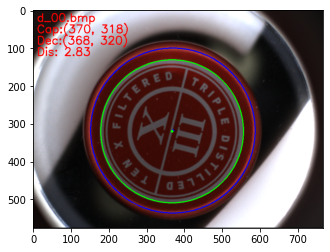

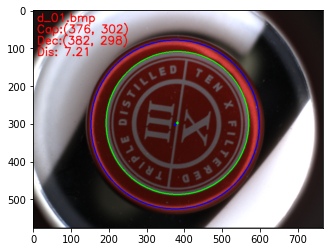

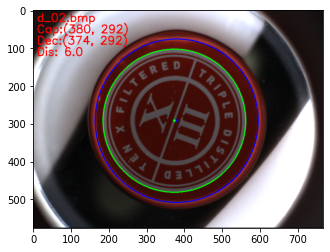

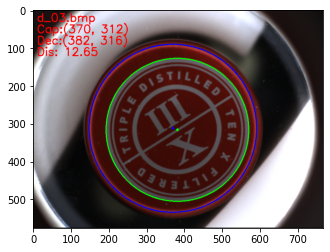

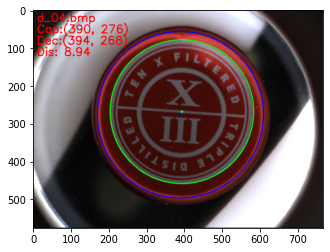

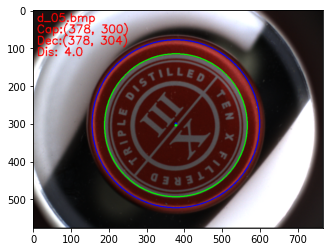

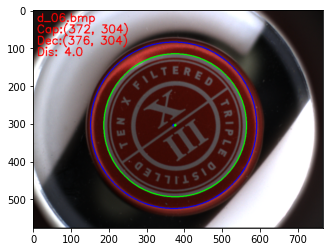

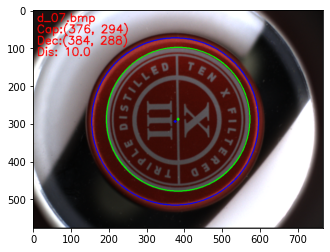

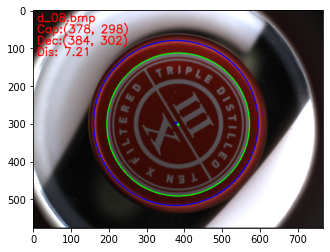

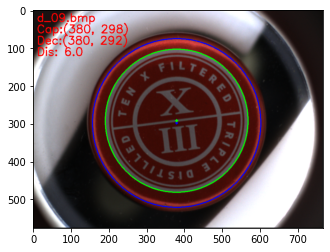

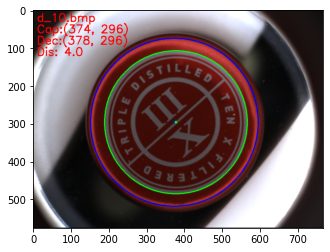

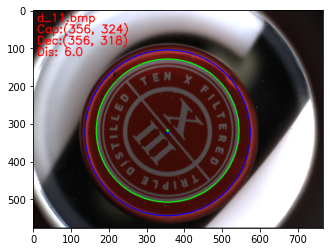

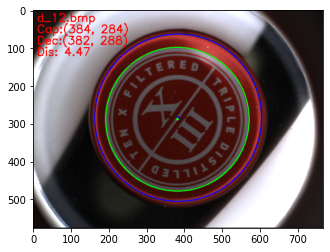

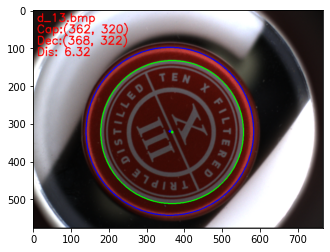

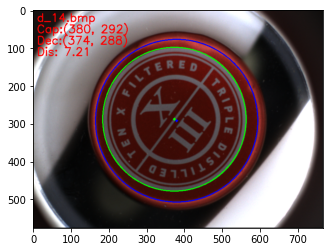

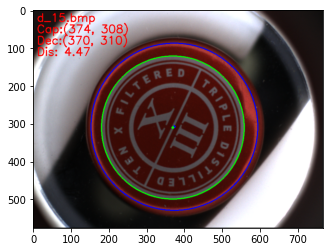

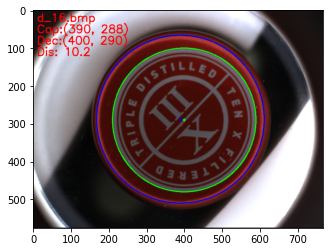

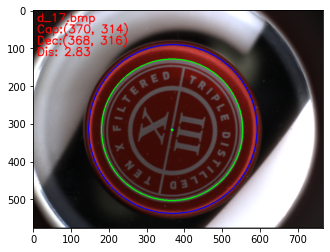

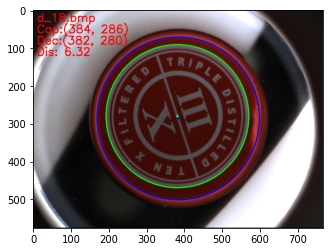

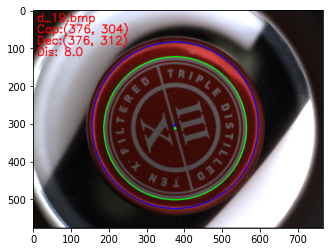

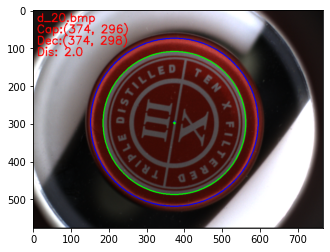

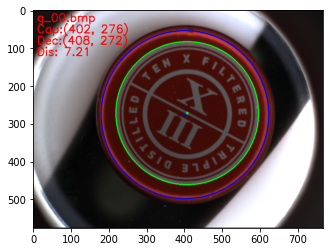

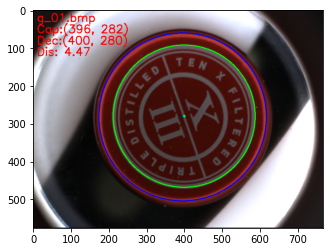

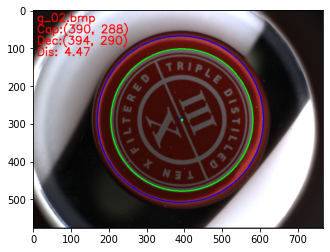

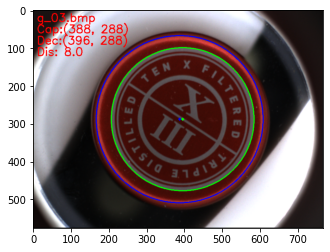

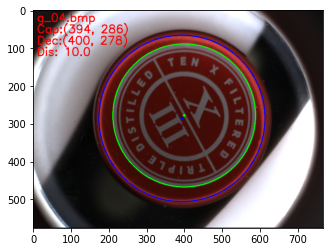

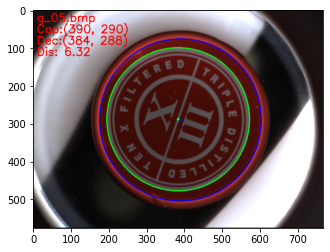

In [6]:
res = []
for index, dd in enumerate(dec):
    res.append(np.copy(dec[index]))
    cv2.putText(res[index], file_names[index], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, 255, 2)
    captext = f"Cap:{cap_center[index][0],cap_center[index][1]}"
    cv2.putText(res[index], captext, (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, 255, 2)
    dectext = f"Dec:{dec_center[index][0],dec_center[index][1]}"
    cv2.putText(res[index], dectext, (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, 255, 2)
    distext = f"Dis: {off_center_distance[index]}"
    cv2.putText(res[index], distext, (10, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, 255, 2)
    
    plt.imshow(res[index])
    plt.show() 